In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
from scipy import stats
import scanpy.external as sce
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import os

import anndata as ad

import celltypist
from celltypist import models

from copy import deepcopy
from glob import glob


In [2]:
adata = sc.read_h5ad('../data/pre_decontX/all_B_cells_ambient_filtered_with_conf.h5ad.gz')

In [3]:
adata=adata[adata.obs.conf_score>0.9]
#adata.obs = adata.obs.rename(columns={'celltypist_new':'celltype'})
adata = adata[adata.obs['celltypist'].str.contains("B cells|Plasma")]
adata = adata[~(adata.obs.celltypist == 'CD16+ NK cells')]
celltype_color_dict = {'Age-associated B cells': '#1f77b4', 'Memory B cells': '#ff7f0e', 'Naive B cells': '#2ca02c', 'Plasma cells': '#d62728', 'Plasmablasts': '#9467bd', 'Proliferative germinal center B cells': '#8c564b', 'unknown': '0.5'}
celltype_color_dict.update({'Pro-B cells':'0.2'})

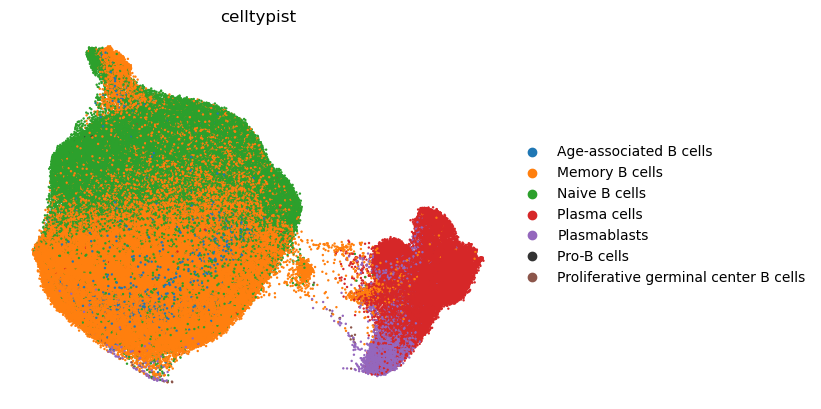

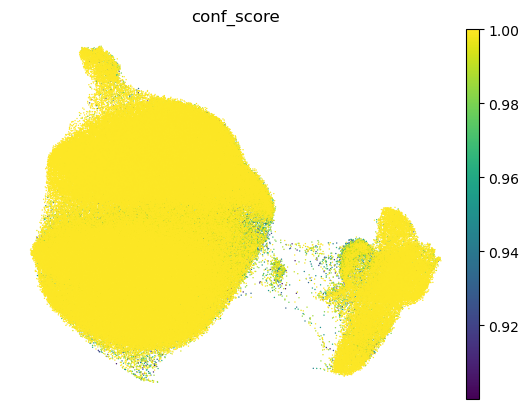

In [5]:
fig=sc.pl.umap(adata, color=['celltypist'],size=12, add_outline=False, return_fig=True, frameon=False, palette=celltype_color_dict)
fig.savefig('figures/all_umap_celltype.png', bbox_inches='tight')

fig=sc.pl.umap(adata, color=['conf_score'],size=4, add_outline=False, return_fig=True, frameon=False, palette=celltype_color_dict)

# fig=sc.pl.umap(adata, color=['donor'],size=2, add_outline=False, return_fig=True, frameon=False)
# fig.savefig('figures/all_umap_donor.png', bbox_inches='tight')

# fig=sc.pl.umap(adata, color=['tissue'],size=2, add_outline=False, return_fig=True, frameon=False, palette={'SP': '#765760', 'PB': '#C1717B', 'BM': '#266967', 'LN': '#E4B363', 'both': 'k', 'multiple': 'k'})
# fig.savefig('figures/all_umap_tissue.png', bbox_inches='tight')


